# ```aggregate```: Simple Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

Parser debugging for UnderwritingParser written to parser.out


In [2]:
uw = agg.Underwriter()

In [3]:
uw.list()

,Severity,Aggregate,Portfolio
0,cata,auto,Mixed
1,catb,cal,Single
2,catc,casxol,Sublines
3,catd,cata,Three_Line_Example
4,cate,catb,bodoff1
5,directors_a,catc,bodoff2
6,directors_b,catd,bodoff3
7,directors_c,cate,bodoff4
8,fixed,cmp,interesting_cat
9,liaba,comm_auto,mass_test


In [4]:
uw.describe(pretty_print=True);

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
cata,aggregate,pareto,0,2.1,0,3.7,0,0,tropical storms and up US wind events
catb,aggregate,pareto,0,1.7,0,1.7,0,0,category 1 and up US wind events
catc,aggregate,pareto,0,1.4,0,1.3,0,0,category 3 and up US wind events
catd,aggregate,pareto,0,1.1,0,0.4,0,0,category 4 and up US wind events
cate,aggregate,pareto,0,0.9,0,0.1,0,0,category 5 and up US wind events
scs,aggregate,lognorm,1e+08,0,0,25,0,0,industry severe convective storm losses
casxol,aggregate,lognorm,5e+07,0,0,0.5,0,0,"Bermuda like casualty excess of loss book, 0.5 claims"
noncata,aggregate,lognorm,50000,0,0,1e+06,0.1,0,"industry total non cat losses, all lines"
cal,aggregate,lognorm,40000,0,0,462316,0.24,0,"US statutory industry commercial auto liability, SNL 2017"


,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
bodoff1,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 1
bodoff2,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 2
bodoff3,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 3
bodoff4,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 4
Three_Line_Example,portfolio,,0,0,0,0,0,0,"User example, single line, mixed sev, and sublines"
Single,portfolio,,0,0,0,0,0,0,single line example
Mixed,portfolio,,0,0,0,0,0,0,mixed severity example with different CVs
Sublines,portfolio,,0,0,0,0,0,0,sublines defining a limit profile
small_medium_large,portfolio,,0,0,0,0,0,0,"three line example with small, medium and large claims"


,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
fixed,severity,dhistogram,0,0,0,0,0,0,fixed loss of 1
directors_a,severity,lognorm,1e+07,1.25,0,0,0,0,"direcotrs and officers liability class a, sigma=1.25"
directors_b,severity,lognorm,1e+07,1.75,0,0,0,0,"direcotrs and officers liability class b, sigma=1.75"
directors_c,severity,lognorm,1e+07,2,0,0,0,0,"direcotrs and officers liability class c, sigma=2.00"
liaba,severity,lognorm,50,0,0,0,0,0,"prems ops A, lognormal cv=1.0"
liabb,severity,lognorm,24,0,0,0,0,0,"prems ops B, lognormal cv=1.5"
liabc,severity,lognorm,50,0,0,0,0,0,"prems ops C, lognormal cv=2.0"


In [5]:
uw.describe('severity')

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
fixed,severity,dhistogram,0,0.00,0,0,0,0,fixed loss of 1
directors_a,severity,lognorm,10000000,1.25,0,0,0,0,"direcotrs and officers liability class a, sigma=1.25"
directors_b,severity,lognorm,10000000,1.75,0,0,0,0,"direcotrs and officers liability class b, sigma=1.75"
directors_c,severity,lognorm,10000000,2.00,0,0,0,0,"direcotrs and officers liability class c, sigma=2.00"
cata,severity,pareto,0,2.10,0,0,0,0,"small cat, pareto 2.1"
catb,severity,pareto,0,1.70,0,0,0,0,"moderate cat, pareto 1.7"
catc,severity,pareto,0,1.40,0,0,0,0,"severe cat, pareto 1.4"
catd,severity,pareto,0,1.10,0,0,0,0,"very severe cat, pareto 1.1"
cate,severity,pareto,0,0.90,0,0,0,0,"extreme cat, pareto 0.9"


In [6]:
uw['liaba']

('severity',
 {'note': 'prems ops A, lognormal cv=1.0',
  'sev_cv': 1.0,
  'sev_mean': 50,
  'sev_name': 'lognorm'})

Underwriter.__getattr__(liabc) called


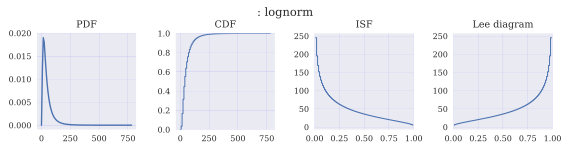

In [7]:
uw.liabc.plot()

In [8]:
ag = uw.ppal
ag.easy_update(14)
ag.report('audit')

Underwriter.__getattr__(ppal) called


,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,ppal,inf,0,1.70282e+11,5.67607e+06,30000,1.70282e+11,0.0890012,0.178,NaN,NaN,NaN,NaN
mixed,ppal,inf,0,1.70282e+11,5.67607e+06,30000,1.70282e+11,0.0890012,0.178,NaN,NaN,1.702262e+11,0.088461


In [9]:
pf = uw.bodoff1
pf.update(8, 1)

Underwriter.__getattr__(bodoff1) called


/s/telos/python/aggregate_project\aggregate\port.py:1093: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python/aggregate_project\aggregate\port.py:1097: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_ημ_' + col])) / \
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


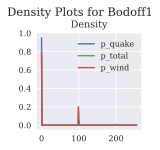

In [10]:
pf.plot('density')

C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:634: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


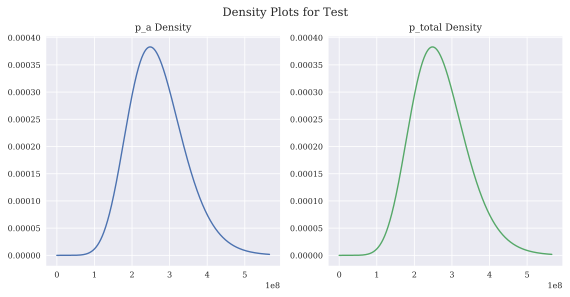

In [11]:
c = uw.write('a: 0.01 * uw.cmp', 'test', update=True, log2=13) 
c.plot(subplots=True, height=4)

In [12]:
biz = uw['homeowners'] 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')

Type: <class 'tuple'>
str:  ('aggregate', {'exp_en': 4337346.319489225, 'exp_limit': 2500, 'freq_name': 'poisson', 'freq_a': 0.24, 'sev_name': 'lognorm', 'sev_cv': 0.5, 'sev_mean': 15.0, 'note': 'US statutory industry homeowners, SNL 2017'})
repr: ('aggregate', {'exp_en': 4337346.319489225, 'exp_limit': 2500, 'freq_name': 'poisson', 'freq_a': 0.24, 'sev_name': 'lognorm', 'sev_cv': 0.5, 'sev_mean': 15.0, 'note': 'US statutory industry homeowners, SNL 2017'})


In [13]:
biz = uw.homeowners 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')

Underwriter.__getattr__(homeowners) called
Type: <class 'aggregate.distr.Aggregate'>
str:  Aggregate: homeowners
	EN=4337346.319489225, CV(N)=0.240
	1 severity, EX=15.0, CV(X)=0.500
	EA=65,060,194.8, CV=0.240
repr: <aggregate.distr.Aggregate object at 0x00000157EC203198>


In [14]:
biz.easy_update(10)
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
biz.report('audit')

Type: <class 'aggregate.distr.Aggregate'>
str:  Aggregate: homeowners
	EN=4337346.319489225, CV(N)=0.240
	1 severity, EX=15.0, CV(X)=0.500
	EA=65,060,194.8, CV=0.240
repr: <aggregate.distr.Aggregate object at 0x00000157EC203198>


,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


In [15]:
biz.recommend_bucket(verbose=True)

Recommended bucket size with 1024 buckets: 121,944
Recommended bucket size with 8192 buckets: 15,243
Recommended bucket size with 65536 buckets: 1,905
Bucket size set with 1024 buckets at 121,944


121943.52285414209

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


,limit,attachment,en,emp ex1,emp cv,sum p_i,wt,nans,max,wtmax,min
n,,,,,,,,,,,
Agg,0,0,4.33735e+06,6.49926e+07,0.238106,1,NaN,0,0.00321723,NaN,9.41809e-13


,limit,attachment,emp ex1,emp cv,freq_1,sev_1,sev_cv,abs sev err,rel sev err
Agg,0,0,6.49926e+07,0.238106,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,4.33735e+06,15,0.5,NaN,NaN
mixed,NaN,NaN,NaN,NaN,4.33735e+06,15,0.5,NaN,NaN
independent,NaN,NaN,NaN,NaN,4.33735e+06,6.50602e+07,0.240001,NaN,NaN


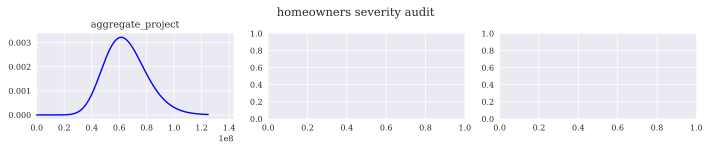

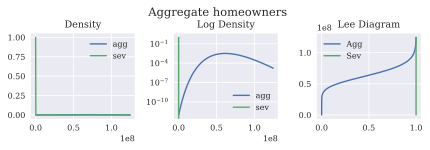

In [16]:
a, b = biz.easy_update(10, reporting_level=1, verbose=True)
display(a)
display(b)

In [17]:
biz.audit_df

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


In [18]:
biz.report('all')

homeowners                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        1.248702e+08  0.240001  6.506019e+07  4.476641e+15  3.248034e+23   
freq                NaN  0.240000  4.337346e+06  1.989618e+13  9.623804e+19   
sev                 NaN  0.500000  1.500000e+01  2.812500e+02  6.591797e+03   

                                        
measure     limit          mean   skew  
component                               
agg        2500.0  6.506019e+07  0.480  
freq          NaN  4.337346e+06  0.480  
sev           NaN  1.500000e+01  1.625

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,homeowners,2500,0,0.5,6.50602e+07,0,0,4.33735e+06,1.98962e+13,9.6238e+19,4.33735e+06,0.24,0.48,15,281.25,6591.8,15,0.5,1.625,6.50602e+07,4.47664e+15,3.24803e+23,6.50602e+07,0.240001,0.48,0.24,0.24,1


# Script Examples

In [19]:
s = uw.write('sev MyLN1 12 * lognorm 1; sev MyLN2 12 * lognorm 2; sev MyLN3 12 * lognorm 3; ')

(19.78465524839477, 1064.0240782460385, 155549.60288723477)
(88.66867318549262, 429257.95012824325, 107363355574.23624)
(1080.2055760001645, 5867615726.256582, 1.7579071533924387e+19)
[19.784655248401538, 88.668673187167798, 1080.2055756062618]


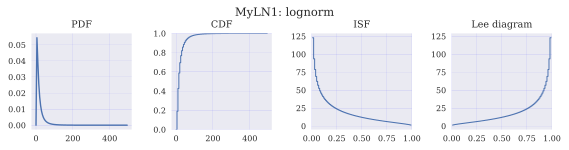

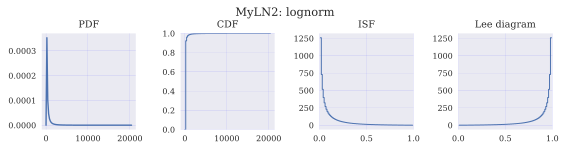

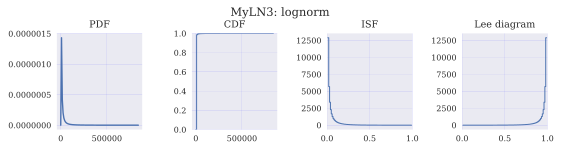

In [20]:
for v in s:
    print(v.moms())
    v.plot()
print([ 12 * np.exp(x*x/2) for  x in [1,2,3]])

In [21]:
pf = uw.write('PA: 0.0085 * uw.pers_auto; CA: 0.02 * uw.comm_auto;WC: 0.005 * uw.work_comp', 'test', True, False, log2=16, bs=10e4, remove_fuzz=True)

In [22]:
print(pf)

Portfolio name           test           
Theoretic expected loss  5,052,868,212.9
Actual expected loss     5,052,737,077.0
Error                          -0.000026
Discretization size                   16
Bucket size                    100000.00


In [23]:
pf.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
CA,3.40564e+09,3.40564e+09,-2.5191e-13,0.0890012,0.0890012,4.9889e-12,4.1507e+09
PA,1.4474e+09,1.4474e+09,-1.07914e-13,0.0890012,0.0890012,1.99019e-12,1.764e+09
WC,1.99826e+08,1.99826e+08,-8.16014e-14,0.190049,0.190049,-1.57963e-12,2.989e+08
total,5.05287e+09,5.05274e+09,-2.59528e-05,0.000384009,0.0657487,170.217,5.8603e+09


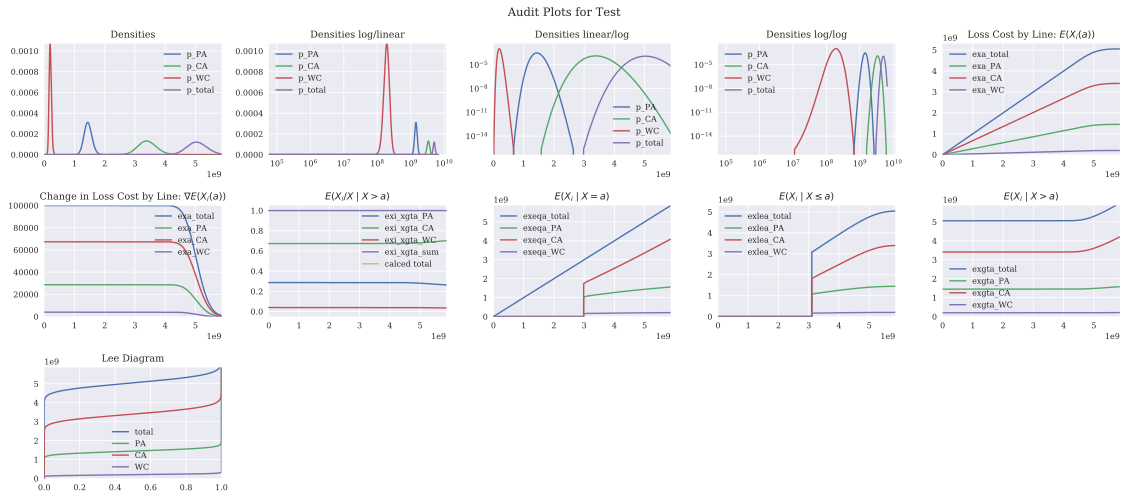

In [24]:
pf.plot('audit', aspect=1.4, height=2.25)

## More complex program 

In [26]:
ans = uw.write("""
A1: 50  claims          sev gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 xs 10 sev gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims          sev gamma 12 cv 1.30 (mixed gamma 0.014)
A4: 50  claims 30 xs 20 sev gamma 12 cv 1.30 (mixed gamma 0.14); B 15 claims 15 xs 15 sev lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 xs 5  sev 25 * pareto 1.3 0 - 25 poisson 
ppa: 1e-8 * uw.ppal
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

/s/telos/python/aggregate_project\aggregate\utils.py:681: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)


In [27]:
ans.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A1,0.875125,0.437562,0.218781,0.109391,0.054695,0.027348,0.013674,0.003418,0.000855
A2,0.295299,0.147649,0.073825,0.036912,0.018456,0.009228,0.004614,0.001154,0.000288
A3,1.085012,0.542506,0.271253,0.135626,0.067813,0.033907,0.016953,0.004238,0.001060
A4,1.233357,0.616678,0.308339,0.154170,0.077085,0.038542,0.019271,0.004818,0.001204
B,8.108148,4.054074,2.027037,1.013518,0.506759,0.253380,0.126690,0.031672,0.007918
Cat,0.139040,0.069520,0.034760,0.017380,0.008690,0.004345,0.002173,0.000543,0.000136
ppa,2.159088,1.079544,0.539772,0.269886,0.134943,0.067472,0.033736,0.008434,0.002108
total,13.895069,6.947534,3.473767,1.736884,0.868442,0.434221,0.217110,0.054278,0.013569


In [28]:
ans.update(13, 1, remove_fuzz=True)

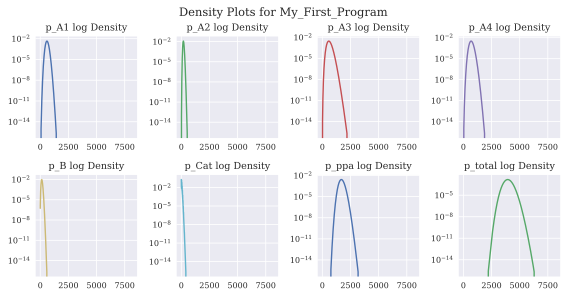

In [29]:
ans.plot('density', subplots=True, logy=True)

In [30]:
ans.report('audit')

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A1,600,0.14831,0.161661,inf,896.128,1,600,0.147687,0.159928,600,367852,2.30245e+08,715,750,816,849,893,959,1070,1.54321e-12,-0.00420109,-0.0107191
A2,187.146,0.179086,0.234015,30,302.386,1,186.809,0.179194,0.23282,186.809,36018.2,7.15593e+06,230,244,270,283,301,327,373,-0.00180148,0.000603144,-0.00510488
A3,600,0.23237,0.378143,inf,1111.05,1,599.44,0.232189,0.377611,599.44,378700,2.5125e+08,783,842,961,1020,1104,1229,1451,-0.000933893,-0.00078231,-0.00140686
A4,699.395,0.224917,0.326112,30,1262.96,1,699.286,0.176088,0.205336,699.286,504164,3.74144e+08,860,909,1004,1050,1114,1209,1371,-0.000156099,-0.217099,-0.370351
B,137.407,4.80947,9.60003,15,8302.74,1,137.369,0.301804,0.330664,137.369,20589.2,3.32411e+06,192,209,243,260,284,319,379,-0.000276859,-0.937248,-0.965556
Cat,28.2652,0.876978,0.943368,25,142.377,1,28.2629,0.877132,0.943343,28.2629,1413.35,89055.6,62,75,100,115,133,163,215,-8.16325e-05,0.000175445,-2.64776e-05
ppa,1702.82,0.089,0.178,inf,2210.91,1,1702.82,0.089,0.178,1702.82,2.92257e+06,5.05546e+09,1900,1959,2075,2132,2211,2327,2528,-1.23235e-14,2.04947e-13,-1.02167e-10
total,3955.04,0.0541237,0.15893,inf,4666.5,1,3953.99,0.0663414,0.120726,3953.99,1.57028e+07,6.26352e+10,4293,4394,4588,4682,4811,4999,5320,-0.000264726,0.225736,-0.240381


In [31]:
for a in ans:
    print(a.name, a.attachment, a.limit, a.recommend_bucket(), a.agg_m, a.agg_cv, a.agg_skew)

A1 [0] [ inf] 0.875124875156 600.0 0.148310485132 0.161660591285
A2 [ 10.] [ 30.] 0.295298750981 187.146199792 0.179086072788 0.234015073319
A3 [0] [ inf] 1.08501188835 600.0 0.232370393984 0.378143307862
A4 [ 20.] [ 30.] 1.23335699769 699.395413644 0.224917152707 0.326111893279
B [ 15.] [ 15.] 8.10814796329 137.407488987 4.80946698171 9.6000258052
Cat [ 5.] [ 25.] 0.139040264469 28.2652013945 0.876977826772 0.943367680799
ppa [ 0.] [ inf] 2.15908801119 1702.82199064 0.0890000014933 0.178000000001


In [32]:
for a in ans:
    print(a)

Aggregate: A1
	EN=50.0, CV(N)=0.142
	1 severity, EX=12.0, CV(X)=0.300
	EA=600.0, CV=0.148
Aggregate: A2
	EN=50.0, CV(N)=0.142
	1 severity, EX=3.7, CV(X)=0.771
	EA=187.1, CV=0.179
Aggregate: A3
	EN=50.0, CV(N)=0.142
	1 severity, EX=12.0, CV(X)=1.300
	EA=600.0, CV=0.232
Aggregate: A4
	EN=50.0, CV(N)=0.199
	1 severity, EX=14.0, CV(X)=0.741
	EA=699.4, CV=0.225
Aggregate: B
	EN=15.0, CV(N)=4.807
	1 severity, EX=9.2, CV(X)=0.604
	EA=137.4, CV=4.809
Aggregate: Cat
	EN=1.7, CV(N)=0.767
	1 severity, EX=16.6, CV(X)=0.554
	EA=28.3, CV=0.877
Aggregate: ppa
	EN=5676073.301971859, CV(N)=0.089
	1 severity, EX=0.0, CV(X)=  nan
	EA=1,702.8, CV=0.089


In [33]:
ans.report()

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A1,600,600,1.54321e-12,0.14831,0.147687,-0.00420109,816
A2,187.146,186.809,-0.00180148,0.179086,0.179194,0.000603144,270
A3,600,599.44,-0.000933893,0.23237,0.232189,-0.00078231,961
A4,699.395,699.286,-0.000156099,0.224917,0.176088,-0.217099,1004
B,137.407,137.369,-0.000276859,4.80947,0.301804,-0.937248,243
Cat,28.2652,28.2629,-8.16325e-05,0.876978,0.877132,0.000175445,100
ppa,1702.82,1702.82,-1.23235e-14,0.089,0.089,2.04947e-13,2075
total,3955.04,3953.99,-0.000264726,0.0541237,0.0663414,0.225736,4588


In [ ]:
for col in ['Cat']:
    print(col)
    t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

In [ ]:
type(t2)

In [ ]:
n = np.argwhere(np.isnan(t2))
ans.density_df.filter(regex='p_total|ex(le)?a_A$|loss|F|S|exi_xgta_A$').iloc[n[0][0]-10:n[0][0]+10, :]

In [ ]:
t2[1500:2000]

# Integrated Parser

In [ ]:
uw = agg.Underwriter(debug=True)

In [35]:
program1 = """
A:    50  claims,             sev  gamma 12 cv .30          mixed gamma 0.014
Ba:  500 loss,                sev lognorm 50 cv .8
Bb:  500 loss,  1000 xs 0     sev lognorm 50 cv .8
Bg:  500 loss,                sev gamma 50 cv .8
C:   500  loss,      75 xs 25, sev lognorm 50 cv .9
D:    25  claims,    30 xs 20,  sev gamma 12 cv 1.30         (mixed gamma 0.85)
Cat1:  1.7 claims,  125 xs 5,   sev 25 * pareto 1.3 - 25 
Cat2:  3.5 claims, 1000 xs 0,  sev 25 * pareto 2.3 0 - 25
"""
program2 = """
Thick:  500 loss,            sev lognorm 50 cv .8
Thin:  500 loss,  1000 xs 0  sev lognorm 50 cv .8
Cat:  2 claims,  1250 xs 5,  sev 25 * pareto 1.3 - 25 
"""

program3 = '''
MyWC: 0.005 * uw.work_comp
InHomCA: uw.comm_auto * 0.002 ;
HomCA: 0.001 * uw.comm_auto
Cat: 50000000 loss 1e9 xs 0 sev 50000000 * pareto 1.3 - 50000000'''

In [36]:
ans1 = uw.write(program1, 'script example 1', True, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)

In [37]:
ans2 = uw.write(program2, 'script example 2', True, False, log2=10, remove_fuzz=True, trim_df=False)
ans3 = uw.write(program3, 'script example 3', True, False, log2=11, padding=2, remove_fuzz=True, trim_df=False)
# %timeit ans = uw.write(program, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
ans = [ans1, ans2, ans3]

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,600,600,-8.09353e-14,0.14831,0.147658,-0.00439926,816.5
Ba,500,500,-6.88242e-09,0.404969,0.40497,2.39872e-06,1066.5
Bb,500,500,2.46847e-12,0.404932,0.404933,2.54115e-06,1066.5
Bg,500,500,-1.50871e-07,0.404969,0.40497,2.692e-06,1050.5
C,500,499.996,-7.38872e-06,0.321273,0.321278,1.43077e-05,916.5
Cat1,66.131,66.1303,-1.13373e-05,1.1174,1.11742,1.45988e-05,301
Cat2,66.7689,66.7655,-5.02269e-05,1.20361,1.20368,5.58747e-05,372.5
D,349.698,349.684,-3.90302e-05,0.885706,0.248968,-0.718905,570
total,3082.6,3027.58,-0.0178472,0.136149,0.173599,0.275062,0


,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
Cat,135.136,135.088,-0.00035846,1.78082,1.7826,0.000997402,1293.44
Thick,500,499.999,-2.18077e-06,0.404969,0.405058,0.000218911,1067.08
Thin,500,499.999,-2.26806e-06,0.404932,0.405021,0.000217998,1067.08
total,1135.14,1135.08,-5.10047e-05,0.329512,0.329635,0.000372246,2383.62


,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
Cat,5e+07,4.99959e+07,-8.13516e-05,2.93726,2.93689,-0.000126594,1.0001e+09
HomCA,1.70282e+08,1.70282e+08,-2.77556e-15,0.0890012,0.0890012,2.02061e-14,2.08011e+08
InHomCA,3.40564e+08,3.40564e+08,-4.55191e-15,0.0896165,0.0896165,4.66294e-15,4.16022e+08
MyWC,1.99826e+08,1.99826e+08,-3.77476e-15,0.190049,0.190049,-1.62537e-13,2.98501e+08
total,7.60672e+08,7.60364e+08,-0.000405264,0.193131,0.203004,0.0511223,1.65469e+09


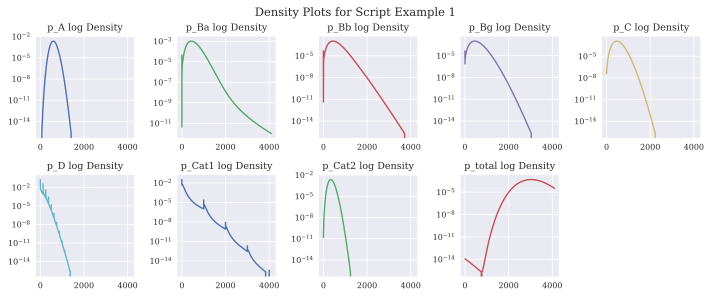

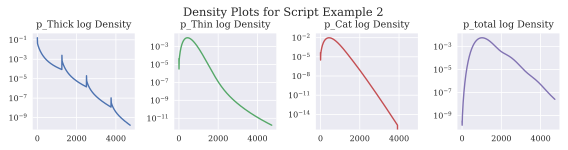

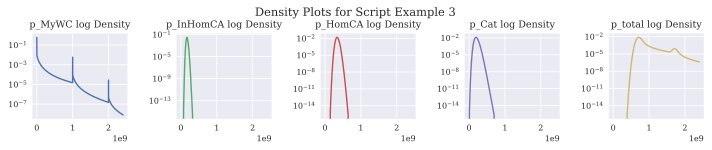

In [38]:
for a in ans:
    a.report()
    a.plot('density', subplots=True, logy=True)

In [ ]:
ans[2].q(.999)

In [ ]:
uw['liaba']

In [ ]:
agg.Severity(**uw['liaba'][1]).plot()

In [ ]:
ans = uw.write('sev CA_PPA lognorm 12 cv 2; sev ilppa 12 * lognorm 2.1')
ans

In [ ]:
for a in ans:
    a.plot()

# Distortions and Pricing

## Line names must be all lower case [a-z] only, no underscores, spaces or numbers

In [39]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 50 claims             | [50, 100, 150, 200] xs 0 | sev lognorm 12 cv [1,2,3,4] wts [0.25 .25 .25 .25] | poisson           |
| low         | 500 premium at 0.5    | 5 xs 5                   | sev gamma 12 cv .30                                | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.4   |
| xsa         | 50  claims            | 30 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.8   |
| hcmp        | 1e-8 * uw.cmp         |                          |                                                   |                   |
"""

In [40]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=12, remove_fuzz=True)

/s/telos/python/aggregate_project\aggregate\port.py:1093: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python/aggregate_project\aggregate\port.py:1097: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_ημ_' + col])) / \


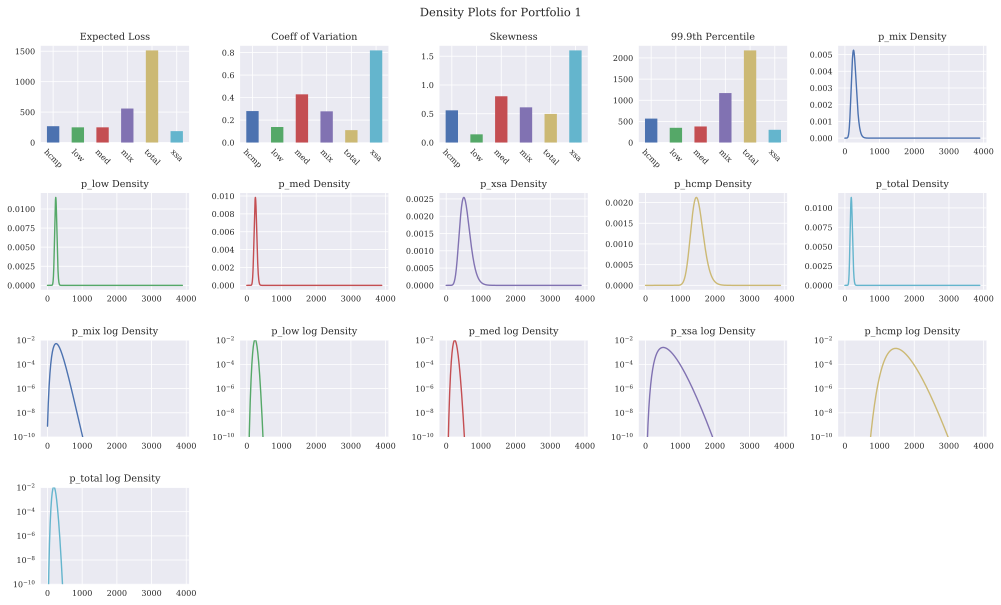

In [41]:
a = agg.axiter_factory(None, 24, aspect=1.4, height=2)
port.plot('quick', axiter=a)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2, logy=True, ylim=[1e-10, 1e-2])
a.tidy()
agg.suptitle_and_tight('Density Plots for Portfolio 1')

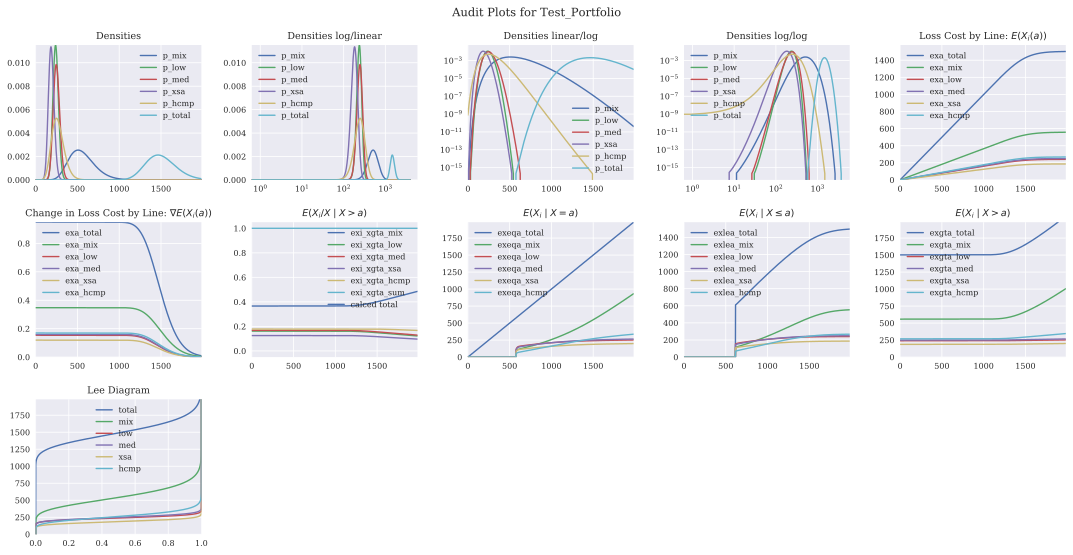

In [42]:
port.plot('audit', aspect=1.2, height=2.5)

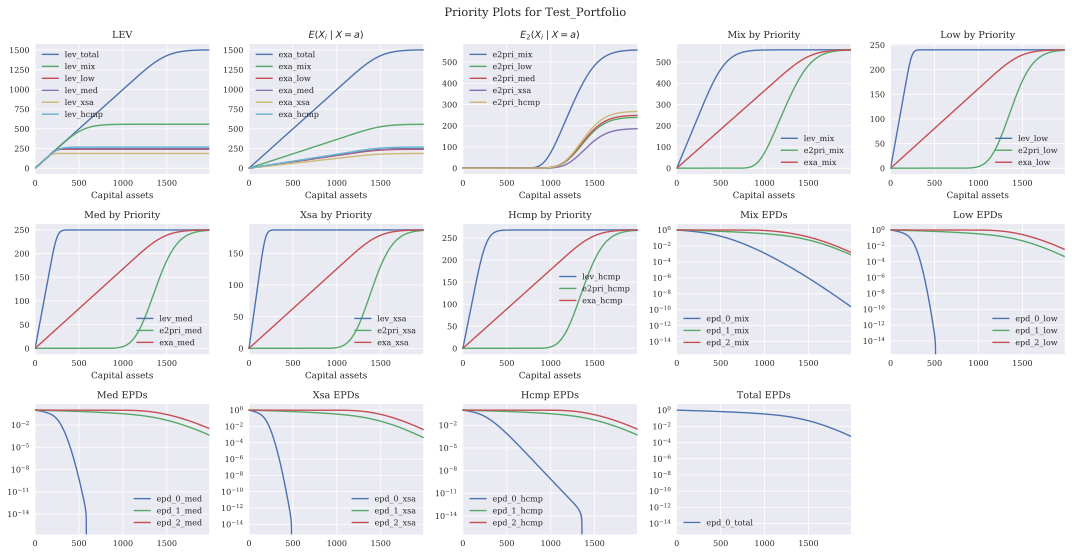

In [43]:
port.plot('priority', aspect=1.2, height=2.5)

In [44]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| mix         | 0.50 claims           | [50, 100, 150, 2000] xs 0 | sev 12 * lognorm [1,2,3,14] wts [0.25 .25 .25 .25] | poisson           |
| low         | 1.500 claims          | 1250 xs 5                | sev 400 * pareto 2.2 - 400                           | mixed gamma 0.014 |
| med         | 500 premium at 0.5 lr | 15 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.4   |
| hard        | 50  claims            | 30 xs 10                 | sev gamma 12 cv .30                                | mixed gamma 0.8   |
"""

In [45]:
port = uw.write(portfolio_program, 'test_portfolio', update=True, verbose=False, log2=14, bs=0.5, remove_fuzz=True)

In [46]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
mix,3.816829,1.908414,0.954207,0.477104,0.238552,0.119276,0.059638,0.014909,0.003727
low,3.406046,1.703023,0.851512,0.425756,0.212878,0.106439,0.053219,0.013305,0.003326
med,0.701371,0.350686,0.175343,0.087671,0.043836,0.021918,0.010959,0.002740,0.000685
hard,1.031344,0.515672,0.257836,0.128918,0.064459,0.032230,0.016115,0.004029,0.001007
total,8.955590,4.477795,2.238898,1.119449,0.559724,0.279862,0.139931,0.034983,0.008746


In [47]:
port.report('audit')

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
hard,187.146,0.81968,1.60103,30,1056.1,1,187.062,0.178702,0.232858,187.062,36109.7,7.18152e+06,230.5,244,270.5,283.5,301,327.5,373,-0.000449438,-0.781986,-0.854558
low,412.763,1.25749,1.77554,1250,3487.79,1,412.762,1.25742,1.7754,412.762,439749,6.52107e+08,1250,1469.5,2199.5,2570,3098,3951,5522,-2.07175e-07,-6.17321e-05,-7.78417e-05
med,250,0.428616,0.80398,15,718.204,1,249.889,0.15413,0.198614,249.889,63927.7,1.67275e+07,300,315.5,345,359.5,379.5,409,459.5,-0.000445647,-0.640402,-0.752962
mix,107.848,4.00411,4.55088,2000,3908.43,1,107.847,4.00416,4.55086,107.847,198112,4.28064e+08,99,308.5,2009,2070,3624,4050,6100,-1.25925e-05,1.18896e-05,-4.70209e-06
total,957.757,0.706958,1.98029,2000,5165.53,0.999999,957.553,0.707074,1.97942,957.553,1.37532e+06,2.8092e+09,1873,2468.5,3336,3867.5,4661,5841,8082,-0.000212879,0.00016435,-0.000442571


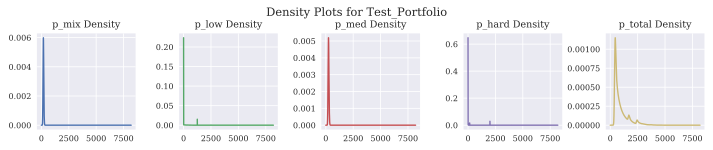

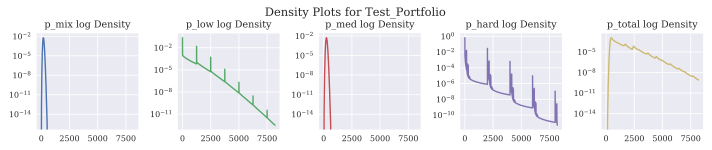

In [48]:
port.plot('density', subplots=True,)
port.plot('density', subplots=True, logy=True)

In [49]:
port.uat(verbose=True,);

,exag_mix,mix,err_mix,exag_low,low,err_low,exag_med,med,err_med,exag_hard,hard,err_hard,exag_total,total,err_total,exag_sumparts,err sum/total,a,applyLR,target,errs
clin,132.628923,132.628923,2.220446e-16,423.296353,423.296353,2.220446e-15,242.590839,242.590839,2.220446e-16,181.599274,181.599274,-1.110223e-16,980.116176,980.116176,-4.996004e-15,8829.041648,8.008158e+00,2927.0,0.965,0.965,-4.662937e-15
lep,124.879558,124.879558,8.881784e-16,419.715685,419.715685,8.881784e-16,249.071174,249.071174,1.554312e-15,186.448976,186.448976,-5.551115e-16,980.116175,980.116175,1.776357e-15,4904.578521,4.004079e+00,2927.0,0.965,0.965,2.075942e-10
ly,128.240625,128.240625,1.776357e-15,416.418072,416.418072,2.220446e-15,249.034714,249.034714,-1.332268e-15,186.421977,186.421977,2.664535e-15,980.116176,980.116176,1.554312e-15,6866.810084,6.006119e+00,2927.0,0.965,0.965,5.107026e-14
ph,115.946109,115.946109,1.554312e-15,428.650394,428.650394,4.440892e-16,249.069399,249.069399,2.664535e-15,186.449487,186.449487,-2.109424e-15,980.116176,980.116176,2.886580e-15,980.115389,-8.028910e-07,2927.0,0.965,0.965,-4.258494e-11
wang,113.025470,113.025470,4.440892e-16,431.057356,431.057356,-6.661338e-16,249.362657,249.362657,-7.771561e-16,186.669904,186.669904,-3.330669e-16,980.116176,980.116176,-1.998401e-15,2942.346952,2.002039e+00,2927.0,0.965,0.965,-1.024625e-12


In [50]:
K = port.q(0.995)  # Resonable capital scale
LR = 0.7
K

3756.5

In [51]:
cd = port.calibrate_distortions(LRs=[LR], As=[K])

In [52]:
cd

$S$   $\iota$  $\delta$     $\nu$        $EL$  \
$a$    LR  method                                                       
3756.5 0.7 ph      0.004999  0.171023  0.146046  0.853954  954.759489   
           wang    0.004999  0.171023  0.146046  0.853954  954.759489   
           lep     0.004999  0.171023  0.146046  0.853954  954.759489   
           ly      0.004999  0.171023  0.146046  0.853954  954.759489   
           clin    0.004999  0.171023  0.146046  0.853954  954.759489   

                           $P$      Levg          $K$       ROE     param  \
$a$    LR  method                                                           
3756.5 0.7 ph      1363.942127  0.570077  2392.557873  0.171023  0.598815   
           wang    1363.942127  0.570077  2392.557873  0.171023  0.579148   
           lep     1363.942127  0.570077  2392.557873  0.171023  0.611149   
           ly      1363.942127  0.570077  2392.557873  0.171023  1.453865   
           clin    1363.942127  0.570077  2392.557873  0.171023  1.650676   

                          error  
$a$    LR  method                
3756.5 0.7 ph      5.888751e-09  
           wang    1.984343e-06  
           lep    -3.251148e-08  
           ly     -9.338237e-10  
           clin    2.273737e-13

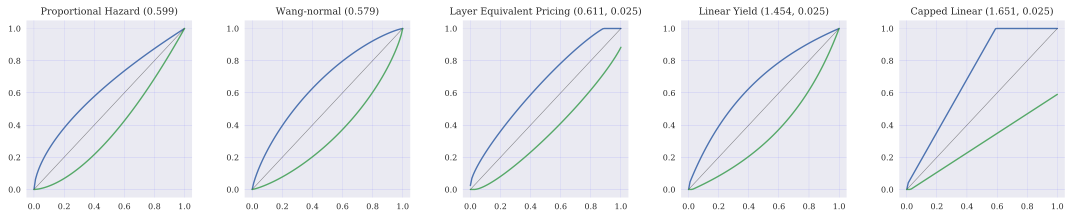

In [53]:
dd = agg.Distortion.distortions_from_params(cd, (K, LR), plot=True)

In [54]:
dd

{'clin': clin (1.6506763229782493, 0.025),
 'lep': lep (0.6111490767533215, 0.025),
 'ly': ly (1.4538646458045934, 0.025),
 'ph': ph (0.5988147614004129),
 'wang': wang (0.5791482864027109)}

,loss,S,exa_total,exa_mix,exa_low,exa_med,exa_hard,exag_mix,exag_low,exag_med,exag_hard,exag_sumparts,exag_total,lr_mix,lr_low,lr_med,lr_hard,lr_total,method,return
3335.5,3335.5,0.010004,951.612212,104.748930,410.517417,249.542273,186.802828,297.498194,610.798195,247.797824,185.501785,11282.887246,1341.597083,0.352099,0.672100,1.007040,1.007014,0.709313,ph,100.0
3756.5,3756.5,0.004999,954.759489,106.284462,411.784122,249.739592,186.950546,309.009312,619.343523,249.106609,186.481580,11410.852424,1363.942127,0.343952,0.664872,1.002541,1.002515,0.700000,ph,200.0
4660.5,4660.5,0.001000,957.045478,107.545684,412.588841,249.865432,187.044754,323.043194,627.731077,250.377866,187.433285,11617.240918,1388.586548,0.332914,0.657270,0.997953,0.997927,0.689223,ph,1000.0
3335.5,3335.5,0.010004,951.612212,104.748930,410.517417,249.542273,186.802828,262.714557,650.021229,250.391504,187.448217,13977.059835,1350.576591,0.398718,0.631545,0.996608,0.996557,0.704597,wang,100.0
3756.5,3756.5,0.004999,954.759489,106.284462,411.784122,249.739592,186.950546,269.369429,655.299940,251.210400,188.061264,14140.735584,1363.942129,0.394568,0.628390,0.994145,0.994094,0.700000,wang,200.0
4660.5,4660.5,0.001000,957.045478,107.545684,412.588841,249.865432,187.044754,275.880419,659.343933,251.838734,188.531655,14383.422205,1375.595845,0.389827,0.625757,0.992164,0.992113,0.695732,wang,1000.0
3335.5,3335.5,0.010004,951.612212,104.748930,410.517417,249.542273,186.802828,269.112737,620.949053,250.966975,187.884542,16658.549732,1328.914447,0.389238,0.661113,0.994323,0.994243,0.716082,lep,100.0
3756.5,3756.5,0.004999,954.759489,106.284462,411.784122,249.739592,186.950546,285.615249,628.814391,251.987880,188.649264,16861.744497,1355.067956,0.372125,0.654858,0.991078,0.990995,0.704584,lep,200.0
4660.5,4660.5,0.001000,957.045478,107.545684,412.588841,249.865432,187.044754,322.525558,630.482653,252.821521,189.273014,17156.120796,1395.103970,0.333449,0.654402,0.988308,0.988227,0.686003,lep,1000.0
3335.5,3335.5,0.010004,951.612212,104.748930,410.517417,249.542273,186.802828,245.714302,651.808632,250.684364,187.665407,19325.336883,1335.873777,0.426304,0.629813,0.995444,0.995404,0.712352,ly,100.0


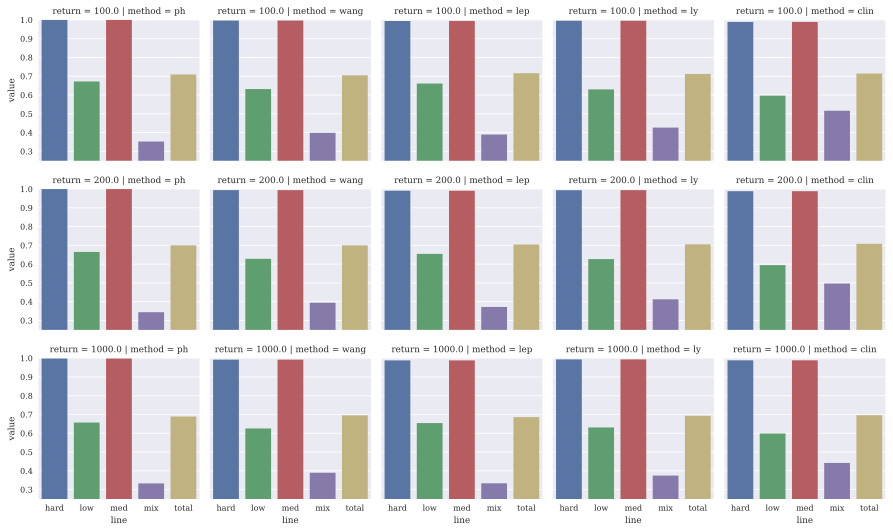

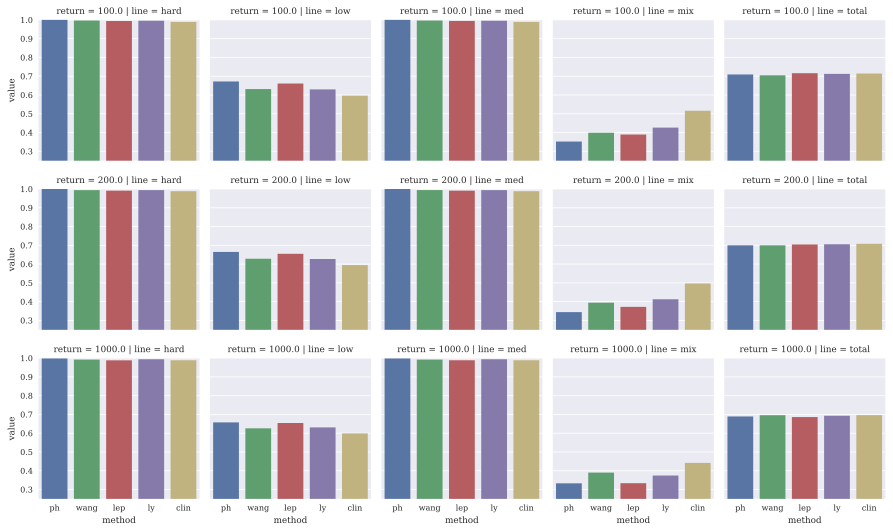

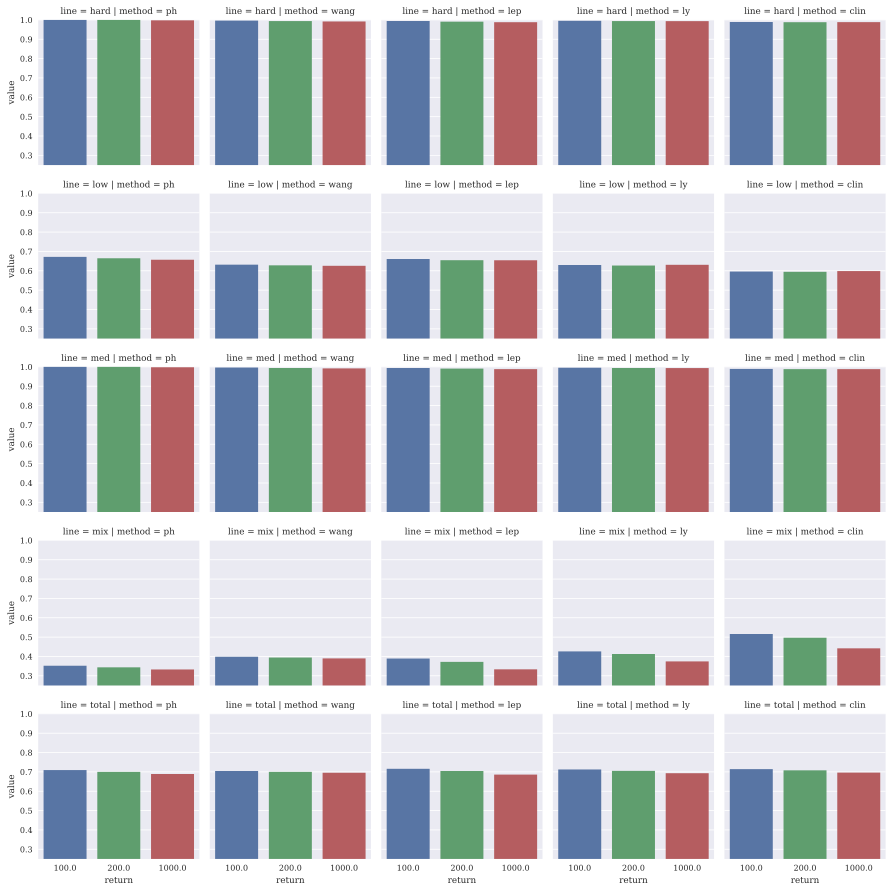

In [55]:
ans_table, ans_stacked = port.apply_distortions(dd, As=[port.q(0.99), port.q(0.995), port.q(0.999)], num_plots=2)

In [ ]:

f = sns.factorplot(x='return', y='value', row='line', col='method', size=2.5, kind='bar',
                           data=ans_stacked.query(' stat=="lr" ')) 

In [ ]:
f.fig

In [ ]:
ft = lambda x: np.fft.fft(x)

In [ ]:
ift = lambda x : np.fft.ifft(x)

In [ ]:
def eg(cv, mean, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    p = np.real(ift(np.exp(mean * (fz-1))))
    c2 = cv*cv
    k = 1/c2
    P = mean * c2
    nb = np.real(ift( (1+P-P*fz)**-k ))
    df = pd.DataFrame(dict(x=range(N), poisson=p, negbin=nb))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    nbm, nbm2, nbm3 = ((df.x**k * df.negbin).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    nbv = nbm2 - nbm*nbm
    c = (nbv/nbm-1)/nbm,
    display(pd.DataFrame(dict(k=k, P=P, pm=pm, pv=pv, nbm=nbm, nbv=nbv, enbv=mean*(1+cv*cv*mean), c=c, nbm3=nbm3, nbm3th=(k*P)**2*(3*(1+P)+P*k)+k*P*(1+P)*(1+2*P)), index=['Sample']))
    return df

In [ ]:
a = eg(.81, 20, 10, logy=True)

In [ ]:
(df.x**2 * df.poisson).sum()

In [ ]:
from scipy.special import kv

In [ ]:
kv(0.5, np.linspace(0,10,20))

In [ ]:
def sichel(α, β, γ, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    ξ = β / np.sqrt(1 - 2*β/α)
    ω = np.sqrt(ξ*ξ + α*α) - ξ
    kgo = kv(γ, ω)
    rad = np.sqrt(1-2*β*(fz-1))
    mean = ξ*kv(γ+1, ω)/kgo
    print(rad)
    p = np.real(ift(np.exp(mean * (fz-1))))
    sichel = np.real(ift( kv(γ, ω*rad) / (kgo * rad**γ) ))
    print(kv(γ, ω*rad))
    df = pd.DataFrame(dict(x=range(N), poisson=p, sichel=sichel))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    sichelm, sichelm2, sichelm3 = ((df.x**k * df.sichel).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    sichelv = sichelm2 - sichelm*sichelm
    display(pd.DataFrame(dict(α=α, β=β, γ=γ, ξ=ξ, ω=ω, pm=pm, pv=pv, sichelm=sichelm, sichelv=sichelv, cv=np.sqrt(sichelv) / sichelm), index=['Sample']))
    return df

In [ ]:
sichel(10, 8, -0.5, 8)

In [ ]:
def pois_pas(claims, claimants_per_claim, cv_claimants, log2, **kwds):
    N = 1<<log2
    z = np.zeros(N)
    z[1] = 1
    fz = ft(z)
    c2 = cv_claimants*cv_claimants
    k = 1/c2
    P = claimants_per_claim * c2
    θ = claims / claimants_per_claim
    p = np.real(ift(np.exp(claims * (fz-1))))  
#     nb = np.real(ift( (1+P-P*fz)**-k ))
    pois_pas = np.real(ift( np.exp(θ*((1+P-P*fz)**-k - 1))))
    df = pd.DataFrame(dict(x=range(N), poisson=p, pois_pas=pois_pas))
    df.plot(kind='line', x='x', **kwds)
    pm, pm2, pm3 = ((df.x**k * df.poisson).sum() for k in (1,2,3))
    pois_pasm, pois_pasm2, pois_pasm3 = ((df.x**k * df.pois_pas).sum() for k in (1,2,3))
    pv = pm2 - pm*pm
    pois_pasv = pois_pasm2 - pois_pasm*pois_pasm
    display(pd.DataFrame(dict(mean=claims, claimants=claimants_per_claim, cv_claimants=cv_claimants, k=k, P=P, θ=θ, pm=pm, pv=pv, pois_pasm=pois_pasm, pois_pasv=pois_pasv, cvest=np.sqrt(pois_pasv) / pois_pasm), index=['Sample']))
    return df

In [ ]:
df = pois_pas(10, 1.1, 2, 8)

In [ ]:
df = pois_pas(10, .55, 2.1, 8, logy=True)